We can observe the file not contains an only one json, it contains a json for value.
We need to read line by line and manage with each json object to make a colection.

In [1]:
import pandas as pd
import Util
import json



values = []
time = []
f = open("../data/raw/measures/H-DHT11-measures.json", "r")
for line in f:
    json_parsed = json.loads(line)
    values.append( json_parsed['value'])
    time.append(pd.to_datetime(json_parsed['time']))

We create a Panda's Dataframe to can manage data.

In [2]:
data_obj = {'values':values, 'time': time}
data = pd.DataFrame()
data['values'] = values
data['time'] = pd.Series(time, name="time", dtype='datetime64[s]')
print(data)

         values                time
0            31 2017-12-22 11:22:11
1            31 2017-12-22 11:22:16
2            31 2017-12-22 11:22:20
3            31 2017-12-22 11:22:24
4            31 2017-12-22 11:22:28
...         ...                 ...
1420297      33 2018-03-13 11:41:53
1420298      33 2018-03-13 11:41:57
1420299      33 2018-03-13 11:42:01
1420300      33 2018-03-13 11:42:05
1420301      33 2018-03-13 11:42:09

[1420302 rows x 2 columns]


We draw a plot of data. And we can observe that this file haven't got all data. We can observe a holes.

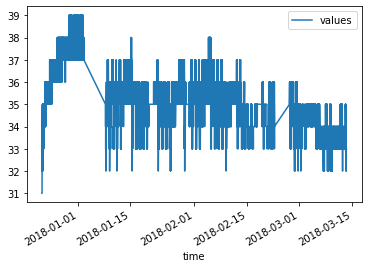

In [3]:
data.plot.line(x = 'time', y = 'values')

Try de find holes, by finding time difference. Make a plot where can view when data ara lost.

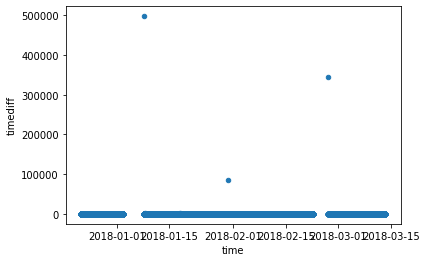

In [4]:
data['timediff'] = (data['time'] -  data['time'].shift(1)).astype('timedelta64[s]')
data.plot.scatter(x = 'time', y = 'timediff')

We try to get and objective interval acceptable of losing data.

Mode is the most repeated and we could consider is the time that is programmed to get data from devices. So that is 4 seconds. We can filter the lowest times that time increase and we could fit the threshold.

mode 1136259
           values     time
timediff                  
3.0           649      649
3.0           649      649
4.0       1136259  1136259
4.0       1136259  1136259
5.0        274989   274989
5.0        274989   274989
6.0          1019     1019
6.0          1019     1019
7.0           497      497
7.0           497      497
8.0           161      161
8.0           161      161
9.0           137      137
9.0           137      137
10.0           74       74
10.0           74       74
11.0           31       31
11.0           31       31
12.0           32       32
12.0           32       32
13.0           19       19
13.0           19       19
14.0           62       62
14.0           62       62
15.0           39       39
15.0           39       39
16.0          137      137
16.0          137      137
17.0          684      684
17.0          684      684
18.0         1214     1214
18.0         1214     1214
19.0         1727     1727
19.0         1727     1727
20.0         15

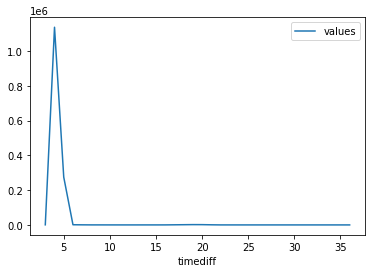

In [5]:
g = data.groupby(['timediff'])
v1 = g.count();
#print(v1)
v2 = v1[v1.values>10]
mode = v1.values.max()
print ("mode", mode)
v2.plot.line(y="values")
print(v2)
#v1.plot.line( y='values')

Try to get interval of lost data. We consider that data is lost if we don't have data during 30 seconds from previous point but we can be more hard fitting value to 7 seconds. We can observe if this threshold goes down the intervals with lost data increases a lot.
We show you all intervals

In [6]:
threshold = 30
data_filter = data[data.timediff.gt(threshold)]

for idx in data_filter.index:
    print( "from", data['time'][idx-1], "to", data['time'][idx], "time(s) losed data", data['timediff'][idx] )

from 2017-12-22 11:23:14 to 2017-12-22 11:30:05 time(s) losed data 411.0
from 2017-12-27 00:25:08 to 2017-12-27 00:25:44 time(s) losed data 36.0
from 2018-01-02 14:28:06 to 2018-01-08 08:39:12 time(s) losed data 497466.0
from 2018-01-08 08:43:45 to 2018-01-08 09:07:12 time(s) losed data 1407.0
from 2018-01-09 11:36:43 to 2018-01-09 11:37:15 time(s) losed data 32.0
from 2018-01-10 14:48:27 to 2018-01-10 14:49:04 time(s) losed data 37.0
from 2018-01-17 08:39:02 to 2018-01-17 08:40:01 time(s) losed data 59.0
from 2018-01-17 12:58:41 to 2018-01-17 12:59:13 time(s) losed data 32.0
from 2018-01-17 18:25:30 to 2018-01-17 18:27:46 time(s) losed data 136.0
from 2018-01-17 21:04:06 to 2018-01-17 21:25:29 time(s) losed data 1283.0
from 2018-01-18 10:07:23 to 2018-01-18 10:07:59 time(s) losed data 36.0
from 2018-01-18 14:15:28 to 2018-01-18 14:15:59 time(s) losed data 31.0
from 2018-01-24 21:14:13 to 2018-01-24 21:14:45 time(s) losed data 32.0
from 2018-01-24 21:25:22 to 2018-01-24 21:26:15 time(s

Finally, we don't need to change o delete data because this file only have problems of lose data but haven't any erroneous data.
We save in a normalized format to can be loaded easily after.

In [7]:
data.drop(columns="timediff").to_json('../data/processed/H-DHT11-measures.json', orient='records', date_format='iso', indent=2)
